<a href="https://colab.research.google.com/github/cubillatamaralaura/Proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# prompt: arme un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias de nivel secundario en Argentina
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Ciencias Sociales", "Educación Física", "Inglés", "Educación Artística", "Música",
    "Tecnología", "Formación Ética y Ciudadana", "Prácticas del Lenguaje"
]

# Función para generar un nombre aleatorio
def generar_nombre():
    nombres = ['Juan', 'Pedro', 'Maria', 'Ana', 'Sofia', 'Luis', 'Diego', 'Carolina', 'Valentina', 'Miguel']
    apellidos = ['Gomez', 'Perez', 'Rodriguez', 'Gonzalez', 'Lopez', 'Martinez', 'Sanchez', 'Romero', 'Torres', 'Flores']
    return f'{random.choice(nombres)} {random.choice(apellidos)}'

# Generar datos para el DataFrame
data = []
for i in range(100):
  nombre = generar_nombre()
  dni = random.randint(10000000, 50000000) # DNI ficticio
  for materia in materias:
    nota1 = random.randint(1, 10)
    nota2 = random.randint(1, 10)
    nota3 = random.randint(1, 10)
    faltas = random.randint(0, 20)
    data.append([nombre, dni, materia, nota1, nota2, nota3, faltas])

# Crear el DataFrame
df = pd.DataFrame(data, columns=['Nombre Completo', 'DNI', 'Materia', 'Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre', 'Faltas a Clases'])

# Mostrar el DataFrame
df

,Nombre Completo,DNI,Materia,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a Clases
0,Miguel Romero,41811527,Matemática,5,6,5,16
1,Miguel Romero,41811527,Lengua y Literatura,5,1,9,5
2,Miguel Romero,41811527,Historia,3,2,5,19
3,Miguel Romero,41811527,Geografía,9,8,4,15
4,Miguel Romero,41811527,Ciencias Naturales,9,10,3,5
...,...,...,...,...,...,...,...
1295,Miguel Gonzalez,19706161,Educación Artística,2,8,10,15
1296,Miguel Gonzalez,19706161,Música,8,7,5,19
1297,Miguel Gonzalez,19706161,Tecnología,6,9,5,14
1298,Miguel Gonzalez,19706161,Formación Ética y Ciudadana,9,4,5,11


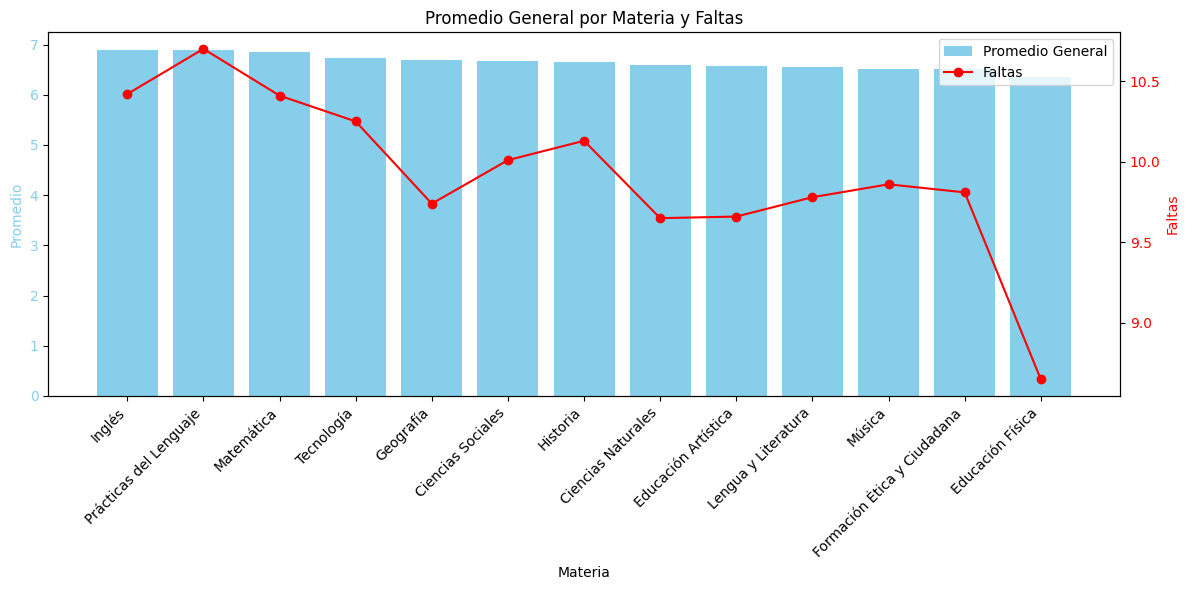

In [4]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calcular el promedio de cada materia
promedios_materias = df.groupby('Materia').agg({'Nota 1er Trimestre': 'mean', 'Nota 2do Trimestre': 'mean', 'Nota 3er Trimestre': 'mean', 'Faltas a Clases': 'mean'})
promedios_materias['Promedio General'] = promedios_materias.mean(axis=1)

# Ordenar las materias por promedio general de mayor a menor
promedios_materias = promedios_materias.sort_values('Promedio General', ascending=False)

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barra para el promedio general
ax1.bar(promedios_materias.index, promedios_materias['Promedio General'], color='skyblue', label='Promedio General')
ax1.set_xlabel('Materia')
ax1.set_ylabel('Promedio', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Eje secundario para las faltas
ax2 = ax1.twinx()
ax2.plot(promedios_materias.index, promedios_materias['Faltas a Clases'], color='red', marker='o', label='Faltas')
ax2.set_ylabel('Faltas', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Agregar título y leyendas
plt.title('Promedio General por Materia y Faltas')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)


# Rotar las etiquetas del eje x para mejor legibilidad
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [5]:
df.to_csv("datos_alumnos.csv", index=False)